# Dynamics

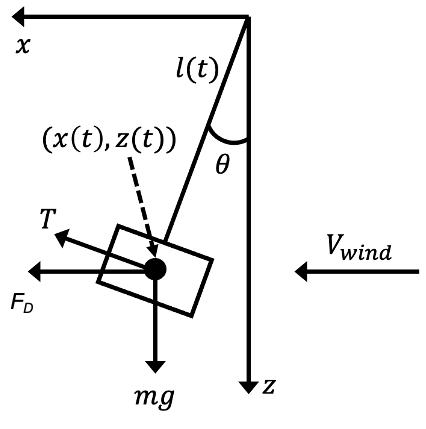

### Position and $x$ velocity of the droid
Looking at the FBD above:
$$
\begin{aligned}
& x(t)=l(t) \sin \theta(t) \\
& \dot{x}(t)=\dot{l} \sin \theta+l \dot{\theta} \cos \theta \\
& z(t)=l \cos \theta
\end{aligned}
$$

### Wind Drag
The drag is proportional to the square of the relative speed between the wind and the droid (assumed to be dominant in $x$ direction). The direction of drag depends on the sign of $V_{\text{rel}}$
$$
\begin{aligned}
& V_{\text {rel }}=V_{\text {wind}}-\dot{x}=V_{\text {wind}}-(\dot{l} \sin \theta+l \dot{\theta} \cos \theta) \\
& F_D=\underbrace{\frac{1}{2} \rho C_d A}_k V_{\text {rel }}\left|V_{\text {rel }}\right|
\end{aligned}
$$

### Euler-Lagrange Equation of Motion
Using Euler-Lagrange formula is easier than trying to derive the coriolis effect manually.

#### Kinetic energy $T$
$$
\begin{aligned}
T & =\frac{1}{2} m v^2 \\
& =\frac{1}{2} m\left(V_{tangential}^2+V_{radial}^2\right) \\
& =\frac{1}{2} m\left[(l \dot{\theta})^2+(\dot{l})^2\right]
\end{aligned}
$$

#### Potential energy $U$
Positive $z$ and $g$ act in same direction, so potential energy is negative as defined in FBD.
$$
\begin{aligned}
U & =-m g z \\
& =-m g l \cos \theta
\end{aligned}
$$

#### Lagrangian $\mathcal{L}$
$$
\begin{aligned}
\mathcal{L} & =T-U \\
& =\frac{1}{2} m\left[(l \dot{\theta})^2+(\dot{l})^2\right]+m g l \cos \theta
\end{aligned}
$$

#### Euler-Lagrange:
$$
\begin{aligned}
& \frac{d}{d t}\left(\frac{\partial \mathcal{L}}{\partial \dot{\theta}}\right)-\frac{\partial L}{\partial \theta}=Q_\theta \\
& \frac{d}{d t}\left(m l^2 \dot{\theta}\right)+m g l \sin \theta=Q_\theta \\
& \underbrace{2 m l \dot{l} \dot{\theta}}_{coriolis} 
+ \underbrace{m l^2 \ddot{\theta}}_{\substack{\text { angular } \\
\text { momentum }}} + m g l \sin \theta=T l+k l V_{\text {rel }}\left|V_{\text {rel }}\right| \cos \theta \\
\end{aligned}
$$

$$
\boxed{\ddot{\theta}=\frac{T}{m l}+\frac{k}{m l} V_{\text {rel }}\left|V_{\text {rel }}\right| \cos \theta-\frac{g}{l} \sin \theta-2 \frac{\dot{l}}{l} \dot{\theta}} \quad \dots \text{varying tether}
$$

For the special case where the tether length is kept constant (no reel-out), $\dot{l}=0$:

$$
\boxed{\ddot{\theta}=\frac{T}{m l}+\frac{k}{m l} V_{\text {rel }}\left|V_{\text {rel }}\right| \cos \theta-\frac{g}{l} \sin \theta} \quad \dots \text{constant tether}
$$

### Linearization Strategy

We want to convert the nonlinear equation $\ddot{\theta}=f(\theta, \dot{\theta}, l, T, \dot{l})$ into a linear system:
$$
\delta \dot{\mathbf{x}}=A \delta \mathbf{x}+B \delta \mathbf{u}
$$

We use a Taylor Series Expansion about the current operating point ($\mathbf{x}_{\text {op}}, \mathbf{u}_{\text {op}}$). This involves computing the partial derivatives (Jacobians) of the dynamics with respect to the state and input.
1. State Vector: $\mathbf{x}=[\theta, \dot{\theta}, l]^T$
2. Input: $u=[T, \dot{l}]$
2. Vector Field: $\dot{\mathbf{x}} = \mathbf{f}(\mathbf{x}, u)=[\dot{\theta}, \ddot{\theta}, \dot{l}]^T$

$$
\dot{\mathbf{x}} =
\left[\begin{array}{l}
\dot{\theta} \\
\ddot{\theta} \\
\dot{l}
\end{array}\right]=\left[\begin{array}{c}
\dot{\theta} \\
\frac{T}{m l}+\frac{k}{m l} V_{\text {rel }}\left|V_{\text {rel }}\right| \cos \theta-\frac{g}{l} \sin \theta-2 \frac{\dot{l}}{l} \dot{\theta} \\
\dot{l}
\end{array}\right]
$$

3. First-order Taylor Expansion:
$$
\dot{\mathbf{x}} \approx \mathbf{f}\left(\mathbf{x}_{o p}, u_{o p}\right)+\underbrace{\left.\frac{\partial \mathbf{f}}{\partial \mathbf{x}}\right|_{o p}}_A\left(\mathbf{x}-\mathbf{x}_{o p}\right)+\underbrace{\left.\frac{\partial \mathbf{f}}{\partial u}\right|_{o p}}_B\left(u-u_{o p}\right)+\ldots
$$
$$\dot{\mathbf{x}} \approx \mathbf{f}(\mathbf{x}_{op}, \mathbf{u}_{op}) + A (\mathbf{x} - \mathbf{x}_{op}) + B (\mathbf{u} - \mathbf{u}_{op})$$

To find the $A$ and $B$ matrices, to avoid using the chain and product rules by hand for the nested dependencies on the state in the drag term's $V_{\text{rel}}$

We can further write the equation in affine form:
$$\dot{\mathbf{x}} \approx A \mathbf{x} + B \mathbf{u} + \underbrace{(\mathbf{f}(\mathbf{x}_{op}, \mathbf{u}_{op}) - A \mathbf{x}_{op} - B \mathbf{u}_{op})}_{\mathbf{d} \text{ (Drift Term)}}$$



In [142]:
import sympy as sp
import jax.numpy as jnp
from jax import jit 
import numpy as np
import matplotlib.pyplot as plt

def get_symbolic_jacobian_matrices():
    # 1. Define Symbols
    theta, theta_dot, l = sp.symbols(r'theta theta_dot l', real=True)
    T, l_dot = sp.symbols(r'T l_dot', real=True)
    m, g, k, V_wind = sp.symbols(r'm g k V_wind', real=True)

    # 2. Physics Model
    x_dot_val = l_dot * sp.sin(theta) + l * theta_dot * sp.cos(theta)
    V_rel = V_wind - x_dot_val
    # Note: simplifying Abs for smoother derivatives if needed, but standard Abs works
    F_drag_x = k * V_rel * sp.Abs(V_rel) 
    
    # Dynamics (f1, f2, f3)
    f1 = theta_dot
    f2 = (T/(m*l)) - (g/l)*sp.sin(theta) - (2*l_dot/l)*theta_dot + (F_drag_x*sp.cos(theta))/(m*l)
    f3 = l_dot
    
    # Matrices
    state = sp.Matrix([theta, theta_dot, l])
    u_vec = sp.Matrix([T, l_dot])
    f_vec = sp.Matrix([f1, f2, f3])
    
    A_sym = f_vec.jacobian(state)
    B_sym = f_vec.jacobian(u_vec)
    
    # Drift d = f(x_op, u_op) - A*x_op - B*u_op
    d_sym = f_vec - A_sym @ state - B_sym @ u_vec

    # Create arguments list: (theta, theta_dot, l, T, l_dot, m, g, k, V_wind)
    args = (theta, theta_dot, l, T, l_dot, m, g, k, V_wind)
    
    # Convert to JAX-compatible functions
    f_jax = sp.lambdify(args, f_vec, modules='jax')
    A_jax = sp.lambdify(args, A_sym, modules='jax')
    B_jax = sp.lambdify(args, B_sym, modules='jax')
    d_jax = sp.lambdify(args, d_sym, modules='jax')
    
    return f_jax, A_jax, B_jax, d_jax

# Generate the functions ONCE
f_fn, A_fn, B_fn, d_fn = get_symbolic_jacobian_matrices()

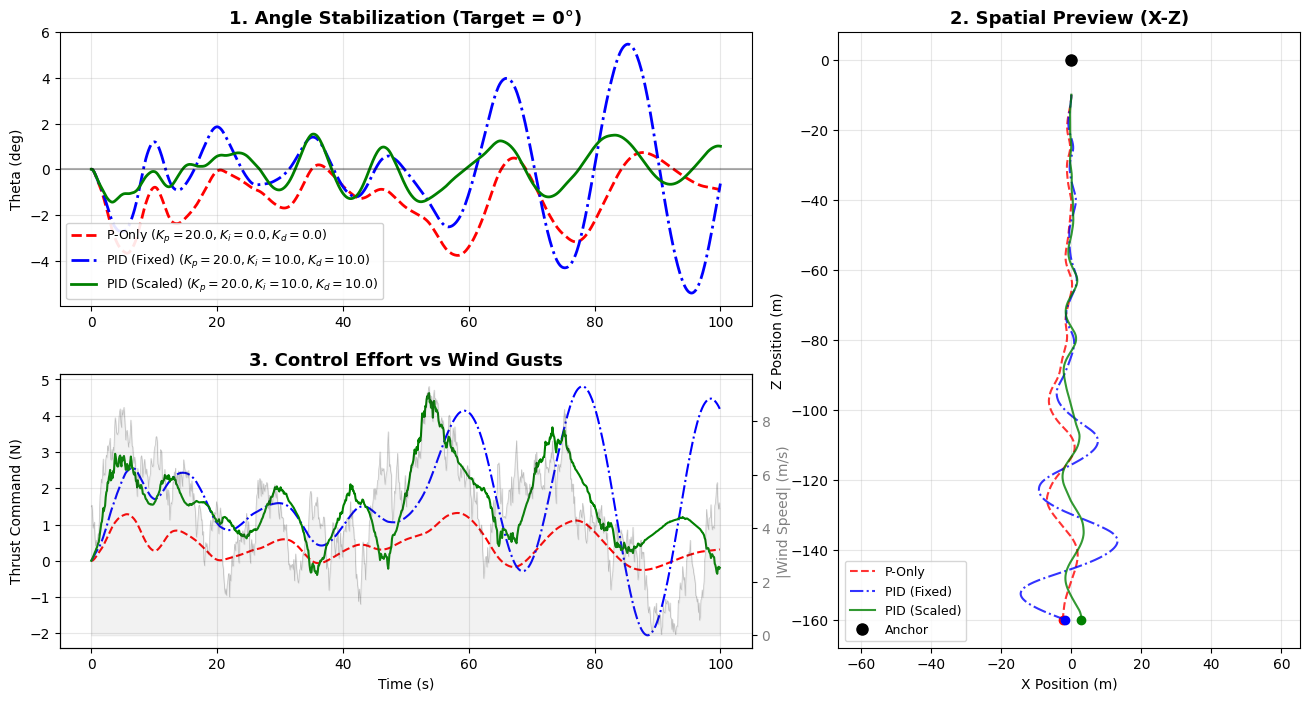

In [150]:
import numpy as np
import jax.numpy as jnp
import matplotlib.pyplot as plt
from matplotlib.gridspec import GridSpec

# --- 1. CONFIGURATION ---
dt = 0.1
T_sim = 100
N = int(T_sim/dt)

# Physics Parameters
rho = 1.225
Cd = 1.0
S = 0.1
k_aero = 0.5 * rho * Cd * S
base_params = {'m': 5.0, 'g': 9.81, 'k': k_aero}

# Initial Conditions
x0 = jnp.array([0.0, 0.0, 10.0]) 

# --- 2. CONTROLLER & HELPER FUNCTIONS ---

def generate_wind_profile(N, dt, mean=-5.0, sigma=2.0, tau=5.0):
    noise_scale = sigma * np.sqrt(2 * dt / tau)
    wind_hist = []
    v_gust = 0.0
    np.random.seed(42) 
    for _ in range(N):
        noise = np.random.normal(0, 1)
        v_gust = v_gust * (1 - dt / tau) + noise * noise_scale
        wind_hist.append(mean + v_gust)
    return np.array(wind_hist)

def pid_control_law(target_theta, state, integral_error, dt, Kp, Ki, Kd, current_wind, k_aero, use_drag_scaling=True):
    theta, theta_dot, _ = state
    
    # Drag Scaling
    if use_drag_scaling:
        est_drag = k_aero * (current_wind**2)
        drag_scale = 1.0 + est_drag
    else:
        drag_scale = 1.0
    
    # PID Terms
    error = target_theta - theta
    d_error = -theta_dot 
    
    p_term = (Kp * error) * drag_scale # Scaling applied here
    i_term = Ki * integral_error
    d_term = Kd * d_error
    
    u_thrust = np.clip(p_term + i_term + d_term, -100.0, 100.0) 
    return u_thrust, integral_error + error * dt

def run_simulation(wind_profile, gains):
    x_hist = [x0]
    u_hist = []
    curr_x = x0
    integral_err = 0.0
    
    kp, ki, kd = gains['kp'], gains['ki'], gains['kd']
    use_scaling = gains['scale']
    
    for i in range(N):
        curr_wind = wind_profile[i]
        
        thrust, integral_err = pid_control_law(
            0.0, curr_x, integral_err, dt, 
            kp, ki, kd, 
            curr_wind, base_params['k'], 
            use_drag_scaling=use_scaling
        )
        
        u_current = jnp.array([thrust, 1.5]) 
        u_hist.append(thrust)
        
        curr_p_args = (base_params['m'], base_params['g'], base_params['k'], curr_wind)
        args_nl = (*curr_x, *u_current, *curr_p_args)
        
        # JAX Function Call (Nonlinear Truth)
        x_dot = jnp.array(f_fn(*args_nl)).flatten()
        curr_x = curr_x + x_dot * dt
        x_hist.append(curr_x)
        
    return np.array(x_hist), np.array(u_hist)

# --- 3. DEFINE CASES ---
cases = [
    {'name': 'P-Only',        'kp': 20.0, 'ki': 0.0,  'kd': 0.0, 'scale': False, 'color': 'r', 'style': '--'},
    {'name': 'PID (Fixed)',   'kp': 20.0, 'ki': 10.0, 'kd': 10.0, 'scale': False, 'color': 'b', 'style': '-.'},
    {'name': 'PID (Scaled)',  'kp': 20.0, 'ki': 10.0, 'kd': 10.0, 'scale': True,  'color': 'g', 'style': '-'}
]

# --- 4. EXECUTION ---
wind_data = generate_wind_profile(N, dt)
results = {}

for c in cases:
    label_str = f"{c['name']} ($K_p={c['kp']}, K_i={c['ki']}, K_d={c['kd']}$)"
    x_res, u_res = run_simulation(wind_data, c)
    results[c['name']] = {'x': x_res, 'u': u_res, 'label': label_str, 'color': c['color'], 'style': c['style']}

# --- 5. PLOTTING LAYOUT ---
t = np.arange(N+1) * dt
t_u = np.arange(N) * dt 

fig = plt.figure(figsize=(16, 8))
# GridSpec: 2 rows, 2 columns. 
# Width ratios: Left column is wider (1.5x) than Right column (1x)
gs = GridSpec(2, 2, width_ratios=[1.5, 1.0], wspace=0.15, hspace=0.25)

# === PLOT 1 (Top Left): ANGLE DEVIATION ===
ax1 = fig.add_subplot(gs[0, 0])
for name, res in results.items():
    theta_deg = np.degrees(res['x'][:, 0])
    ax1.plot(t, theta_deg, color=res['color'], linestyle=res['style'], linewidth=2, label=res['label'])

ax1.set_title("1. Angle Stabilization (Target = 0°)", fontsize=13, fontweight='bold')
ax1.set_ylabel("Theta (deg)")
ax1.axhline(0, color='k', alpha=0.3)
ax1.grid(True, alpha=0.3)
# Legend inside plot 1 to save space
ax1.legend(loc='lower left', fontsize=9, framealpha=0.9)


# === PLOT 3 (Bottom Left): CONTROL EFFORT ===
ax3 = fig.add_subplot(gs[1, 0], sharex=ax1)
for name, res in results.items():
    ax3.plot(t_u, res['u'], color=res['color'], linestyle=res['style'], linewidth=1.5, label=name)

ax3.set_ylabel("Thrust Command (N)")
ax3.set_xlabel("Time (s)")
ax3.set_title("3. Control Effort vs Wind Gusts", fontsize=13, fontweight='bold')
ax3.grid(True, alpha=0.3)

# Add Wind on Secondary Axis for Plot 3
ax3_wind = ax3.twinx()
ax3_wind.fill_between(t_u, np.abs(wind_data), color='gray', alpha=0.1, label='|Wind|')
ax3_wind.plot(t_u, np.abs(wind_data), 'k-', linewidth=0.5, alpha=0.2)
ax3_wind.set_ylabel("|Wind Speed| (m/s)", color='gray')
ax3_wind.tick_params(axis='y', labelcolor='gray')


# === PLOT 2 (Right Column): SPATIAL TRAJECTORY ===
# Spans both rows (gs[:, 1])
ax2 = fig.add_subplot(gs[:, 1])

for name, res in results.items():
    l = res['x'][:, 2]
    theta = res['x'][:, 0]
    X = l * np.sin(theta)
    Z = -l * np.cos(theta)
    
    # Plot line
    ax2.plot(X, Z, color=res['color'], linestyle=res['style'], linewidth=1.5, alpha=0.8, label=name)
    # Plot end marker
    ax2.plot(X[-1], Z[-1], marker='o', color=res['color'], markersize=6)

ax2.plot(0, 0, 'ko', markersize=8, label='Anchor') # Anchor
ax2.set_title("2. Spatial Preview (X-Z)", fontsize=13, fontweight='bold')
ax2.set_xlabel("X Position (m)")
ax2.set_ylabel("Z Position (m)")
ax2.axis('equal') # Crucial for spatial plots
ax2.grid(True, alpha=0.3)

# Simplified legend for spatial plot (just names)
handles, labels = ax2.get_legend_handles_labels()
# Filter to avoid duplicate labels if any
by_label = dict(zip(labels, handles))
ax2.legend(by_label.values(), by_label.keys(), loc='lower left', fontsize=9)

plt.show()

In [144]:
l0 = 1.0          # Nominal tether length (m)
l_dot = 0.1       # Constant tether retraction rate (m/s)
m = 4.0           # Mass (kg)
g = 9.81          # Gravity (m/s^2)
rho = 1.225       # Air density (kg/m^3)
C_d = 1.0         # Drag coefficient
A = 0.1           # Cross-sectional area (m^2)
v_wind_abs_max = 40.0  # Maximum wind speed (m/s)


# Simulation parameters
dt = 0.01   # Time step (s)
T_sim = 20   # Total simulation time (s)
N = int(T_sim / dt)  # Number of simulation steps

theta0 = 0.09
theta_dot0 = 0.0

T_max_abs = 10.0  # Maximum absolute thrust value

Kp = 5.0
Ki = 10.0
Kd = 7.0

theta_max = 0.15
alpha = 10 # tuning for barrier function theta_dot
kappa = 1 # tuning for barrier function theta_dot
epsilon = 0.01

theta_unsafe_radius = theta_max  # ≈ 5°

theta_bounds = 15 * jnp.pi / 180         # ~22.5°
theta_dot_bounds = 30 * jnp.pi / 180     # ~45°/s
ell_min = 1
ell_max = 100
ell_dot_min = 0.5
ell_dot_max = 5

l_desired = ell_max
Kp_ell = 0.1

# PID Controller
Assuming we have a wind speed sensor onboard, we can readily compute the droid's relative wind live, and thus the expected $F_D \propto V_{rel}^2$

Using this expected drag, we can apply a proportional control input to attempt to bring the droid back to the vertical